![](Bilder/MBILogo.png)

# FP O4: Fourier-Transform Holography
## _Experimental part_

This notebook is used for data analysis of the experimental part of the Fourier-transform holography experiment. The results should be exported from the notebook and used in the final report. However, we demand to generate a pdf from this notebook and hand it in as appendix to the experimental report. Use these text boxes and [Markdown formatting](https://de.wikipedia.org/wiki/Markdown) to produce your text. If you prefer, you can change the language of this document to German.

## Important: File saving

If you reopen the script at home with binder, remember that binder uses a local copy of all data. Once the binder session is terminated or receives a time out, all local data will be _irrevocably lost._ To save your data, open a terminal in the main jupyter window (`new` → `terminal`) and run `./git.sh`using the credientials provided.

## Import Libraries

This has do be executed once in the beginning. The libaries loaded include functions for numerical operations, scientific plotting and image manipulation.

In [3]:
# NumPy – The fundamental package for scientific computing with Python
# https://numpy.org/
import numpy as np

# Matplotlib – Visualization with Python
# https://matplotlib.org/
#for interactive plots
%matplotlib inline 
#When exporting to pdf rplace the "notebook" with "inline" and replot every plot.
#This replaces the interactive plots with regular ones that can be converted with LaTeX.
import matplotlib.pyplot as plt

# SciPy – Python-based ecosystem of open-source software for mathematics, science, and engineering
# https://www.scipy.org/
from scipy.ndimage.interpolation import rotate

# Standard python library to create copies and pointers
# https://docs.python.org/3/library/copy.html
from copy import deepcopy

## Load the Data

Please specify the **entire file path and the file name**. Every time you want to analyze a new image, you have to load it here and then execute every step. You may want to copy the code or copy the whole notebook for different experimental runs. 

In [4]:
file_folder = r"//" #directory to the folder where the images recorded by the camera are stored
prefix = '' #please change the prefix name according to the run image name given by the camera software

save_folder = r'//' #directory to the folder where you want to save the images. Make sure it exists!
prefix_save = '' #prefix that is added to the saved images. Change it as you like it.

numbers = [0,99] #first and last number of the image you want to load

for i in range(numbers[0], numbers[1] + 1):
    tmp = plt.imread(file_folder + prefix + '%04d.tif'%i)
    if i == 0:
        holo_exp = deepcopy(tmp.astype(float))
    else:
        holo_exp += tmp.astype(float)

#the FFT needs a quadratic image as input
x,y = holo_exp.shape
if x<y:
    holo_exp = holo_exp[:, np.int((y-x)/2):-np.int((y-x)/2)]
elif x>y:
    holo_exp = holo_exp[np.int((x-y)/2):-np.int((x-y)/2),:]

## Plot the image

Plot the summed hologram.

You can adjust the scale of the image by specifying the mininal (*vmin*) and maximal (*max*) displayed value. You can do this with choosing the percentiles inthe first cell but you can also type in any number you like.

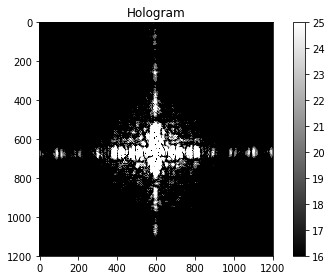

In [5]:
MinV, MaxV = np.percentile(holo_exp,(2.5, 97.5))

fig, ax = plt.subplots()
ax = plt.imshow(holo_exp, cmap='gray', vmin = MinV, vmax = MaxV)
plt.colorbar()
plt.title('Hologram')

fig.tight_layout()

## Fourier Transformation – Reconstruct

In [1]:
recon_exp = np.abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(holo_exp))))

NameError: name 'np' is not defined

## Plot the image

As before...

Remember that the autosaving uses `prefix`for generating the file name.

In [ ]:
MinV, MaxV = np.percentile(recon_exp,(1,99))

fig, ax = plt.subplots()

ax = plt.imshow(recon_exp, cmap = 'gray', vmin = MinV, vmax = MaxV)
plt.colorbar()
plt.title('Reconstruction')

fig.tight_layout()

#save image and data
plt.savefig(save_folder + prefix_save + 'recon_exp.png')
np.save(save_folder + prefix_save + 'recon_exp', recon_exp) #saves as numpy array. can be opened in another notebook with np.load('filepath')

## Lineout

Do reasonable intensity lineouts to determine the resolution using the 10%–90% criterion.

You can determine the pixel positions by using the cursor over your image. You can also select an area of the image to enlarge it using the butten left of the floppy disc.

If your reconstruction is not horizontally aligned, you need to rotate your image with the first cell.

In [ ]:
#rotate the image if it is not horizontally aligned
rot = rotate(recon_exp, 0) #inut the image as numpy array and the angle in degree

fig, ax = plt.subplots()
ax.imshow(rot, cmap = 'gray')

In [ ]:
def lineout(image, startX, endX, startY, endY, file_prefix):
    lineout = np.sum(image[startY:endY, startX:endX], 0)
    
    #plot the lineout
    fig, ax = plt.subplots()
    ax = plt.plot(lineout)
    plt.title("Lineout for resultion")
    plt.xlabel("Pixel")
    plt.ylabel("Intensity [a.u.]")
    
    #save the lineout
    np.savetxt(save_folder + file_prefix + 'lineout.txt', lineout)
    return

In [ ]:
#if you rotated you image, please put in the rotated image instead of "image"
lineout(recon_exp, startX = , endX = , startY = , endY = , file_prefix= prefix_save + 'exp')